In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
countries = gpd.read_file("data/countries.shp");
countries.head()

d = gpd.

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [9]:
conflicts = pd.read_csv("data/acled2019.csv")
conflicts.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,Bhubaneswar,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,Huizucar,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV


In [12]:
gdf = gpd.GeoDataFrame(
    conflicts, 
    geometry=gpd.points_from_xy(conflicts.longitude, conflicts.latitude)
)

gdf.to_file("data/acled2019.shp", crs={'init' :'epsg:4326'})

<ipython-input-12-9184364f916c>:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("data/acled2019.shp", crs={'init' :'epsg:4326'})
C:\Users\padidar\anaconda3\envs\spatialds\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

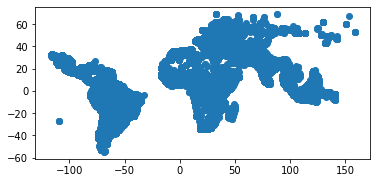

In [14]:
conflicts = gpd.read_file('data/acled2019.shp')
conflicts.plot(markersize=1)

<AxesSubplot:>

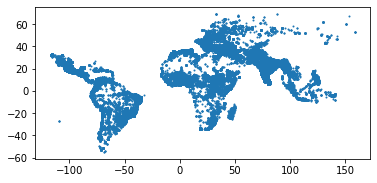

In [17]:
country_shape = countries[['NAME','geometry']]
country_shape.head(2)

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


In [18]:
country_name = countries[['NAME','POP_EST']]
country_name.head(2)

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992


In [20]:
country_join = country_shape.merge(country_name, on='NAME', how='left')
country_join.head()

,NAME,geometry,POP_EST
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",260580739
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",31381992
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",17789267
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",11138234
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",31036656


In [21]:
type(country_name)

pandas.core.frame.DataFrame

In [22]:
type(country_join)

geopandas.geodataframe.GeoDataFrame

In [23]:
conflicts.head()

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


In [26]:
conflicts_gdf = conflicts[['sub_event_','source','geometry']]
conflicts_gdf.head()

,sub_event_,source,geometry
0,Armed clash,Yemen Data Project; Aden al Ghad; Al Janoob al...,POINT (47.07650 14.35410)
1,Change to group/activity,Al Janoob al Youm; Yemen Data Project,POINT (47.07650 14.35410)
2,Armed clash,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,POINT (47.15700 14.20810)
3,Peaceful protest,Pioneer (India),POINT (85.83380 20.27240)
4,Attack,El Salvador.com,POINT (-89.23830 13.58940)


In [27]:
conflicts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
country_shape.head()

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [28]:
country_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
conflicts_merging = conflicts_gdf.merge(country_shape , on='geometry' , how='left')

In [43]:
conflicts_joining = conflicts_gdf.sjoin(country_shape , how='inner' , op='within')

C:\Users\padidar\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
conflicts_joining2 = gpd.sjoin(conflicts_gdf, country_shape , how='inner' , op='within')

C:\Users\padidar\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [47]:
conflicts_joining2.shape

(196422, 5)

In [45]:
conflicts_merging.shape

(198761, 4)